# Research on Predicting residential electricity consumption patterns based on smart meter and household data in UK

Load and Preprocess the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('LCL-June2015v2_99.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC004221,Std,2013-08-06 07:00:00.0000000,0.046
1,MAC004221,Std,2013-08-06 07:30:00.0000000,0.04
2,MAC004221,Std,2013-08-06 08:00:00.0000000,0.016
3,MAC004221,Std,2013-08-06 08:30:00.0000000,0.018
4,MAC004221,Std,2013-08-06 09:00:00.0000000,0.016


In [ ]:
df.columns

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41193 entries, 0 to 41192
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LCLid                    41193 non-null  object
 1   stdorToU                 41193 non-null  object
 2   DateTime                 41193 non-null  object
 3   KWH/hh (per half hour)   41192 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
count,41193,41193,41193,41192
unique,3,1,30892,1457
top,MAC004222,Std,2013-08-26 00:00:00.0000000,0.024
freq,30907,41193,4,420


In [ ]:
# Check for missing values
df.isnull().sum()

,0
LCLid,0
stdorToU,0
DateTime,0
KWH/hh (per half hour),1


In [ ]:
df_cleaned = df.copy()

In [ ]:
# Convert DateTime to datetime format and extract hour and day features
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'], format='%Y-%m-%d', errors='coerce') # Added format and errors arguments
df_cleaned['hour'] = df_cleaned['DateTime'].dt.hour
df_cleaned['day'] = df_cleaned['DateTime'].dt.day

In [ ]:
# Drop the original DateTime and LCLid columns as they are not useful for modeling
df_cleaned = df_cleaned.drop(columns=['DateTime', 'LCLid'])

In [ ]:
# Summary statistics of the dataset
df_cleaned.describe()

,hour,day
count,1.0,1.0
mean,0.0,3.0
std,NaN,NaN
min,0.0,3.0
25%,0.0,3.0
50%,0.0,3.0
75%,0.0,3.0
max,0.0,3.0


In [ ]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

In [ ]:
# Assuming the column name is correct after checking
df_cleaned = df_cleaned.dropna(subset=['KWH/hh (per half hour)'])

#Proceed with data analysis and modeling
X = df_cleaned[['stdorToU']]
y = df_cleaned['KWH/hh (per half hour)']

# Data Visualizations

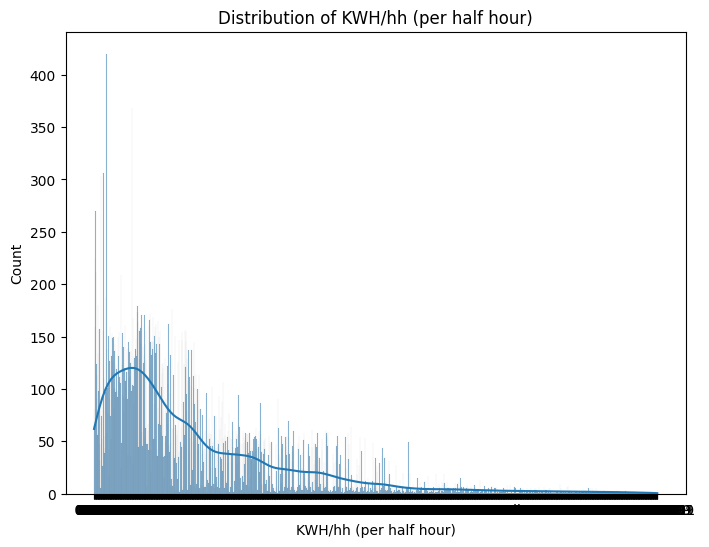

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['KWH/hh (per half hour)'], kde=True)
plt.title('Distribution of KWH/hh (per half hour)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


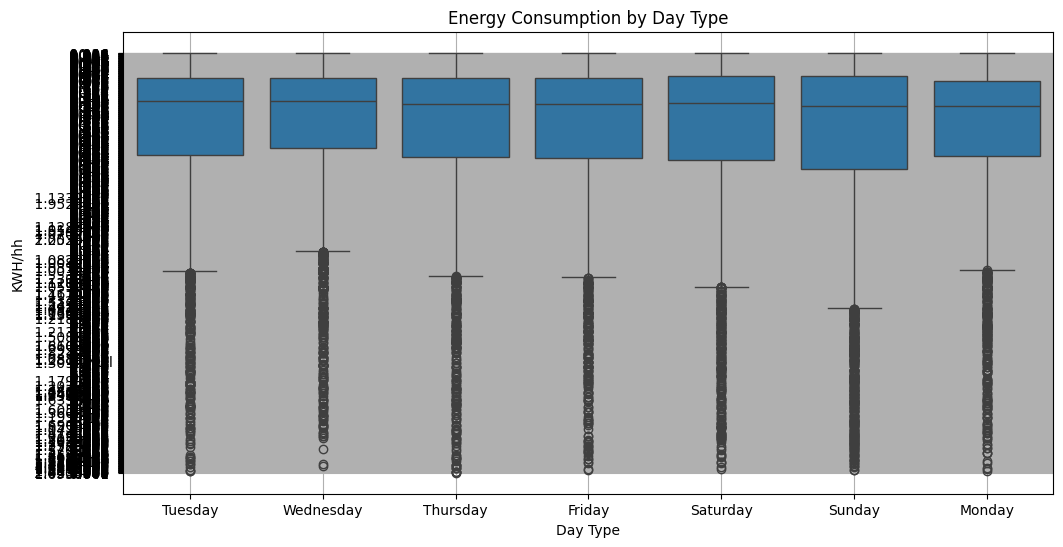

In [ ]:
# Create a new column for the day type
df_cleaned['DayType'] = df_cleaned.index.day_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='DayType', y='KWH/hh (per half hour)', data=df_cleaned)
plt.title('Energy Consumption by Day Type')
plt.xlabel('Day Type')
plt.ylabel('KWH/hh')
plt.grid()
plt.show()

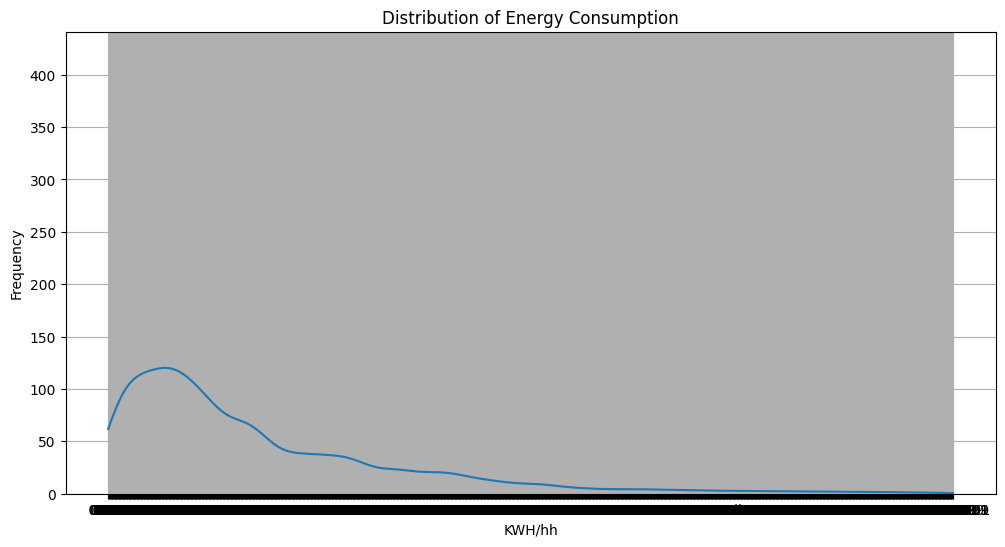

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['KWH/hh (per half hour)'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('KWH/hh')
plt.ylabel('Frequency')
plt.grid()
plt.show()